In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost
from pandas.plotting import scatter_matrix
plt.style.use('ggplot')
%matplotlib inline

train_data = pd.read_csv('input/ml5/train.csv', sep = ";")
test_data = pd.read_csv('input/ml5/test.csv', sep = ";")

train_data.drop('id', axis=1, inplace=True)
test_data.drop('id', axis=1, inplace=True)

y_data = train_data['cardio']
train_data.drop('cardio', axis=1, inplace=True)

In [ ]:
train_data.describe()

In [ ]:
test_data.describe()

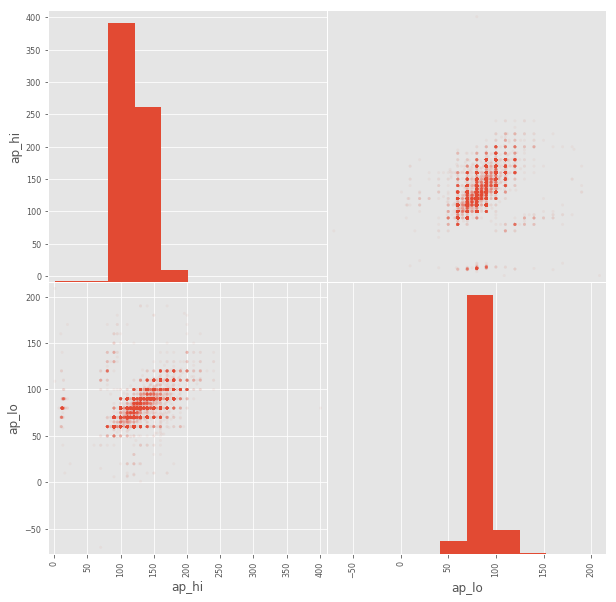

In [31]:
scatter_matrix(train_data[['ap_hi', 'ap_lo']], alpha=0.05, figsize=(10, 10));

In [29]:
train_data[train_data["ap_lo"]==0]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
2014,22712,2,167,59.0,-0.0,0.0,1,1,0,0,1
13489,14965,2,150,60.0,-0.0,0.0,1,1,0,0,0
16459,20457,1,156,50.0,-0.0,0.0,3,1,0,0,1
17381,18226,1,164,78.0,-0.0,0.0,1,1,0,0,1
22923,21182,2,166,68.0,-0.0,0.0,1,1,0,0,1
23867,16131,1,161,92.0,-0.0,0.0,2,1,0,0,1
25454,17952,2,176,73.0,-0.0,0.0,1,1,0,0,1
27686,23396,2,180,73.0,-0.0,0.0,1,1,1,1,1
31783,16070,1,170,64.0,-0.0,0.0,1,1,0,0,1
38370,23208,2,170,81.0,-0.0,0.0,1,1,0,0,1


In [4]:
train_data["ap_hi"][train_data["ap_hi"]<=0] = -1* train_data["ap_hi"]

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
train_data["ap_hi"][train_data["ap_hi"]<=0] = -1* train_data["ap_hi"]
test_data["ap_hi"][test_data["ap_hi"]<=0] = -1* test_data["ap_hi"]

train_data["ap_hi"][train_data["ap_lo"]<=0] = -1* train_data["ap_lo"]
test_data["ap_hi"][test_data["ap_lo"]<=0] = -1* test_data["ap_lo"]


train_data["ap_hi"][train_data["ap_hi"]>10000] = 0.01* train_data["ap_hi"]
test_data["ap_hi"][test_data["ap_hi"]>10000] = 0.01* test_data["ap_hi"]

train_data["ap_lo"][train_data["ap_lo"]>10000] = 0.01* train_data["ap_lo"]
test_data["ap_lo"][test_data["ap_lo"]>10000] = 0.01* test_data["ap_lo"]


train_data["ap_hi"][train_data["ap_hi"]>=500] = 0.1* train_data["ap_hi"]
test_data["ap_hi"][test_data["ap_hi"]>=500] = 0.1* test_data["ap_hi"]

train_data["ap_lo"][train_data["ap_lo"]>=500] = 0.1* train_data["ap_lo"]
test_data["ap_lo"][test_data["ap_lo"]>=500] = 0.1* test_data["ap_lo"]

train_data = train_data[train_data["ap_lo"]!=0]

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCo